# Chapter 4: Minimum spanning trees

In this chapter we will continue to study algorithms that process graphs. We will implement Kruskal's algorithm to construct the **minimum spanning tree** of a graph, a subgraph that efficiently connects all nodes.

## Trees in python

A tree is an undirected graph where any two edges are connected by **exactly one path**. For example, consider the tree below.

![A simple tree](Figures/example_tree.png)

We can represent in python using dictionaries, as we did in the last chapter.

In [ ]:
tree_dict = {'A' : set(['D']), 'B' : set(['D']), 'C' : set(['D']),
             'D' : set(['A', 'B', 'C', 'E']), 'E' : set(['D', 'F']), 'F' : set(['E'])}

Though in this chapter, we prefer to represent the tree as a list (set) of links:

In [ ]:
tree_links = [(node, neighbor) for node in tree_dict.keys() for neighbor in tree_dict[node]]
tree_links

If we choose one node as the **root** of the tree, we have exactly one path from this root to each of the other terminal nodes. This idea can applied recursively as follows: from this root, each neighboring is itself a root of a subtree. Each of these subtrees also consist of a root and possibly one or more subtrees. Hence we can also represent the tree as a nested sublist:

```
tree = [root, [subtree1], [subtree2],...]
```

For our example, we obtain when taking node D as a root: (see [here](http://interactivepython.org/courselib/static/pythonds/Trees/ListofListsRepresentation.html))

In [ ]:
tree_list = ['D', ['A'], ['B'], ['C'], ['E', ['F']]]

## Minimum spanning tree

Suppose we have an undirected connected weighted graph $G$ as depicted below.

![A weighted graph](Figures/graph.png)

Weighted graphs can either be implemented as a set of weighted edges of as a dictionary.

In [ ]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

edges = set([(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')])

In [ ]:
weighted_adj_list = {v : set([]) for v in vertices}

for weight, vertex1, vertex2 in edges:
    weighted_adj_list[vertex1].add((weight, vertex2))
    weighted_adj_list[vertex2].add((weight, vertex1))  # undirected graph, in=outgoing edge

weighted_adj_list

For example, the nodes may represent cities and the weight of an edge may represent the cost of implementing a communication line between two cities. If we want to make communication possible between all cities, these should be a path between any two cities. A **spanning tree** is a subgraph of $G$ that is a tree which contains all nodes of $G$. The cost of the spanning tree is simply the sum of a the weights of the edges in this tree. Often, multiple spanning trees can be chosen from a connected graph. The **minimum spanning tree** is simply the spanning tree with the lowest cost.

The figure below shows the minimum spanning tree for $G$ in green.

![A weighted graph](Figures/min_spanning_tree.png)

Minimum spanning trees have many applications:
- design of computer-, telecommunication-, transportation- and other networks
- hierachical clustering
- image segmentation and feature extraction
- phylogenetic analysis
- construction of mazes

## Disjoint-set data structure

Implementing an algorithm for finding the minimum spanning tree is fairly straightforward. The only bottleneck is that the algorithm requires the a **disjoint-set data structure** to keep track of a set partitioned in a number of disjoined subsets.

For example, consider the following inital set of eight elements.

![A set of eight elements](Figures/disjointset1.png)

We decide to group elements A, B and C together in a subset and F and G in another subset.

![The same set, but after grouping some elements together.](Figures/disjointset2.png)

The disjoint-set data structure support the following operations:
- **Find** check which subset an element is in. Is typically used to check whether two objects are in the same subset.
- **Union** to merge two subsets into a single subset.

A python implementation of a disjoint-set is available using an union-set forest. A simple example will make everything clear!

In [1]:
from union_set_forest import USF

animals = ['mouse', 'bat', 'robin', 'trout', 'seagull', 'hummingbird',
           'salmon', 'goldfish', 'hippopotamus', 'whale', 'sparrow']
union_set_forest = USF(animals)

# group mammals together
union_set_forest.union('mouse', 'bat')
union_set_forest.union('mouse', 'hippopotamus')
union_set_forest.union('whale', 'bat')

# group birds together
union_set_forest.union('robin', 'seagull')
union_set_forest.union('seagull', 'sparrow')
union_set_forest.union('seagull', 'hummingbird')
union_set_forest.union('robin', 'hummingbird')

# group fishes together
union_set_forest.union('goldfish', 'salmon')
union_set_forest.union('trout', 'salmon')

In [2]:
# mouse and whale in same subset?
print(union_set_forest.find('mouse') == union_set_forest.find('whale'))

True


In [3]:
# robin and salmon in the same subset?
print(union_set_forest.find('robin') == union_set_forest.find('salmon'))

False


## Kruskal's algorithm

Kruskal's algorithm is a very simple algorithm to find the minimum spanning tree. The main idea is to start with an intial 'forest' of the induvidual nodes of the graph. In each step of the algorithm we add an edge with the smallest possible value that connects two disjoints trees in the forest. This process is continued until we have a single tree, which is a minimum spanning tree, or until all edges are considered. In the former case the algoritm returns the minimum spanning forest. 

### Example run of Kruskal's algorithm

Consider the weighted graph again.

![A weighted graph](Figures/graph.png)

In a first step, the algorithm selects the edge with the lowest weight, here connecting nodes A and D. This edge has a weight of 5.

![The first edge with lowest weight is selected.](Figures/K1.png)



The next edge that is selected connects nodes C and E. This edge also has a weight of 5.

![The second edge is selected.](Figures/K2.png)

The edge between D and F is subsequently selected.

![A third edge is added to the forest.](Figures/K3.png)



In the current forest, the edge between B and D becomes inaccessible. Taking this edge would result in a cycle in our graph (B and D are already connected through A in our forest), so it is forbidden.

![Now edge BD becomes forbidden, because adding it to our forest would result in a cycle.](Figures/K4.png)


The next allowd edge with the lowest weight is between nodes B and E. Taking this edges connects two independent components in our forest and makes other edges forbidden.

![We add edge BD, connecting two components in our forest.](Figures/K5.png)


Finally, edge EG connects the last node G to our tree with the lowest cost.

![Adding edge EG results in the minimum spanning tree.](Figures/K6.png)

### Pseudocode of Kruskal's algorithm

```
function Kruskal(G):
1 A := empty list
2 for each node v in G
3    MAKE-SET(v)
4 for each edge (u, v) ordered by weight(u, v), increasing:
5    if FIND-SET(u) ≠ FIND-SET(v):
6       add (u, v) to A
7       UNION(u, v)
8 return A
```

### Time complexity of Kruskal's algorithm

We assume that by using a disjoint set data structure, ```FIND``` and ```UNION``` can be performed using a time complexity of $\mathcal{O}(1)$. Then the only cost is in sorting the edges by their weight, which can be done with a time complexity of $\mathcal{O}(|E| \log(|E|))$, which is the time complexity of generating the minimum spanning tree using this algorithm.

**Assignment 1: completing Kruskal's algorithm**

1. Complete the code for Kruskals algorithm below. Test the code on the example network given above.
2. Ticket to Ride is a fun boardgame in which you have to connect trains to several important cities in the United States. Load the vertices (cities) and edges (roads) from the file `ticket_to_ride.py`. Compute a minimum spanning tree.

![The map of Ticket to Ride.](Figures/TtRmap.jpg)

In [2]:
def kruskal(vertices, edges):
    """
    Kruskal's algorithm for finding a minimum spanning tree
    Input :
        - vertices : a set of the vertices of the graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B')) for an
                    edge from node A to node B with weigth 0.7
    Output:
        a minumum spanning tree represented as a list of edges
    """
    
    forest = []
    vertexSet = USF(vertices)
    edges.sort()
    i = 0
    neededEdges = len(vertices)-1
    totalCost = 0
    
    while len(forest) != neededEdges:
        edg = edges[i]
        if vertexSet.find(edg[1]) != vertexSet.find(edg[2]):
            forest.append(edg)
            vertexSet.union(edg[1],edg[2])
            totalCost += edg[0]
        i += 1
      
    # complete this
    return forest, totalCost

In [3]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')]

print(kruskal(vertices, edges))

([(5, 'A', 'D'), (5, 'C', 'E'), (6, 'F', 'D'), (7, 'A', 'B'), (7, 'B', 'E'), (9, 'E', 'G')], 39)


In [4]:
from ticket_to_ride import vertices as cities
from ticket_to_ride import edges as roads

In [5]:
# compute here the MST for Ticket to Ride
print(kruskal(cities,roads))

([(1, 'Atlanta', 'Nashville'), (1, 'Charleston', 'Raleigh'), (1, 'Dallas', 'Houston'), (1, 'Kansas City', 'Omaha'), (1, 'Portland', 'Seattle'), (1, 'Seattle', 'Vancouver'), (2, 'Atlanta', 'Charleston'), (2, 'Boston', 'Montreal'), (2, 'Boston', 'New York'), (2, 'Chicago', 'Saint Louis'), (2, 'Dallas', 'Little Rock'), (2, 'Dallas', 'Oklahoma City'), (2, 'Denver', 'Santa Fe'), (2, 'Duluth', 'Omaha'), (2, 'El Paso', 'Santa Fe'), (2, 'Houston', 'New Orleans'), (2, 'Kansas City', 'Oklahoma City'), (2, 'Kansas City', 'Saint Louis'), (2, 'Las Vegas', 'Los Angeles'), (2, 'Los Angeles', 'Phoenix'), (2, 'Nashville', 'Saint Louis'), (2, 'New York', 'Pittsburgh'), (2, 'New York', 'Washington DC'), (2, 'Raleigh', 'Washington DC'), (2, 'Sault St. Marie', 'Toronto'), (3, 'Calgary', 'Vancouver'), (3, 'Denver', 'Salt Lake City'), (3, 'Duluth', 'Sault St. Marie'), (3, 'El Paso', 'Phoenix'), (3, 'Los Angeles', 'San Francisco'), (4, 'Calgary', 'Helena'), (4, 'Charleston', 'Miami'), (4, 'Dallas', 'El Paso')

## The travelling salesman problem

The traveling salesman problem is a well-known problem in computer science. The goal is to find a tour in a graph with a minimal cost. This problem is NP-hard, there is no algorithm to solve this efficiently for large graphs.

The tour is represented as a dictionary, for each key-value pair a vertex and the associated next vertex in the tour.

Below are two heuristic algorithms to find a good tour.

### Nearest Neighbour

The simplest algorithm, can be done in with a time complexity of $\mathcal{O}(|V|^2)$.

1. Select a random vertex.
2. Find the nearest univisited vertex and add it to the path.
3. Are there any unvisited vertices left? If yes, repeat step 2.
4. Return to the first vertex.

### Greedy

A greedy algorithm that gives a solution in $\mathcal{O}(|V|^2\log(|V|))$ time.

1. Sort all edges
2. Select the shortest edge and add it to the tour if it does not:
    - creates a tour with less than $|V|$ vertices 
    - increases the degree of any of the vertices in the tour to more than two.
3. Repeat step 2 until the tour has $|V|$ vertices.

**Assignment 2**

1. Complete the functions `nearest_neighbour_tsa` and `greedy_tsa`. 
2. We have two benchmarks problems, one with 29 and one with 225 cities. For each problem the graph and coordinates of the cities are given. Give the **found optimal cost** and **running time** for the two algorithms.
3. Make a plot of the best tour for each of the two benchmarks.
4. Discuss how you can see on such a plot if the tour is optimal.

In [1]:
import numpy as np
from union_set_forest import USF

In [2]:
def nearest_neighbour_tsa(graph, start):
    """
    Nearest Neighbour heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        - start: the vertex to start
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """
    
    tour = dict.fromkeys(graph.keys())
    nEdges = len(graph)
    selectedVert = start
    tour_cost = 0
    
    for i in range(nEdges-1):
        nbs = list(graph[selectedVert])
        nbs.sort()
        
        for j in range(len(nbs)):
            if tour[nbs[j][1]] == None:
                tour[selectedVert] = nbs[j][1]
                selectedVert = nbs[j][1]
                tour_cost += nbs[j][0]
                break
    
    tour[selectedVert] = start
    nbs = list(graph[selectedVert])
    nbs.sort(key=lambda x: x[1])
    if selectedVert > start:
        tour_cost += nbs[start][0]
    else:
        tour_cost += nbs[start-1][0]
    
    # complete this
    return tour, tour_cost

In [47]:
def greedy_tsa(graph):
    """
    Greedy heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """

    #USF maken van verbonden vertices
    vertices = USF(list(graph.keys()))
    
    #aantal connecties bijhouden per vertex in dict
    nCons = dict.fromkeys(graph.keys(),0)
    
    #tour bijhouden
    tour = []
    tour_cost = 0
    
    #adjacancy matrix opstellen in np array
    
    adjMatrix = np.zeros([len(graph), len(graph)])
    for i in range(len(graph)):
        nbs = list(graph[i])
        for j in range(len(graph)-1):
            adjMatrix[i,nbs[j][1]] = nbs[j][0]
    np.fill_diagonal(adjMatrix,np.nan)

    #de indices van kleinste naar grootste edge sorteren om die dan af te lopen
    sortedIndices = np.dstack(np.unravel_index(np.argsort(np.ravel(adjMatrix)),adjMatrix.shape))[0].tolist()
    
    #counter om het te laten eindigen indien er genoeg edges zijn
    vertexCount = 0
    
    #de verschillende mogelijke edges testen totdat de tour afgelopen is   
    for i in range(len(sortedIndices)):
            
        optEdge = sortedIndices[i]
        optCost = adjMatrix[tuple(optEdge)]
        
        if vertices.find(optEdge[0]) != vertices.find(optEdge[1]) and nCons[optEdge[0]] < 2 and nCons[optEdge[1]] < 2:
            vertexCount += 1
            nCons[optEdge[0]] += 1
            nCons[optEdge[1]] += 1
            tour.append(optEdge)
            tour_cost += optCost
            vertices.union(optEdge[0],optEdge[1])
            
            
        if nCons[optEdge[0]] < 2 and nCons[optEdge[1]] < 2 and vertexCount == len(graph)-1:
            tour.append(optEdge)
            tour_cost += optCost
            
            break

    return tour, tour_cost

In [4]:
# load coordinates and graph for the two benchmark algorithms
from load_tsa import coordinates29, coordinates225, graph29, graph225

In [ ]:
# complete the assignments

In [109]:
path, score = nearest_neighbour_tsa(graph225,0)

# check if there are doubles to check if the cycle is correct. If it is correct, this set should be empty
l = list(path.values())
set([x for x in l if l.count(x) > 1])

set()

In [110]:
#the algorithm seems to be working (also checked visually in the plot later on), now i will search for the starting point 
#which leads to the lowest cost

_, score29 = nearest_neighbour_tsa(graph29,0)
bestStartingpoint = 0
for i in range(1,29):
    _, scoreNew = nearest_neighbour_tsa(graph29,i)
    if scoreNew < score29:
        score29 = scoreNew 
        bestStartingpoint = i
print(scoreNew,bestStartingpoint)

2356.0 22


In [111]:
%timeit nearest_neighbour_tsa(graph29,22)

1000 loops, best of 3: 306 µs per loop


In [112]:
_, score225 = nearest_neighbour_tsa(graph225,0)
bestStartingpoint = 0
for i in range(1,225):
    _, scoreNew = nearest_neighbour_tsa(graph225,i)
    if scoreNew < score225:
        score225 = scoreNew 
        bestStartingpoint = i
print(scoreNew,bestStartingpoint)

5120.352084 116


In [113]:
%timeit nearest_neighbour_tsa(graph225,0)

10 loops, best of 3: 25.6 ms per loop


In [6]:
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
%matplotlib inline

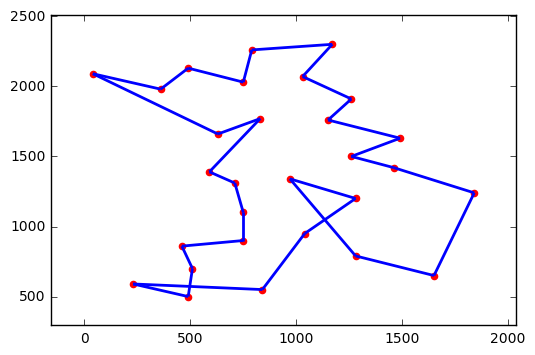

In [115]:
a,b=nearest_neighbour_tsa(graph29,22)
lines = [[k,v] for k,v in a.items()]
lines = [[tuple(coordinates29[k]),tuple(coordinates29[v])] for k,v in lines]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(coordinates29[:,0],coordinates29[:,1],color='red')

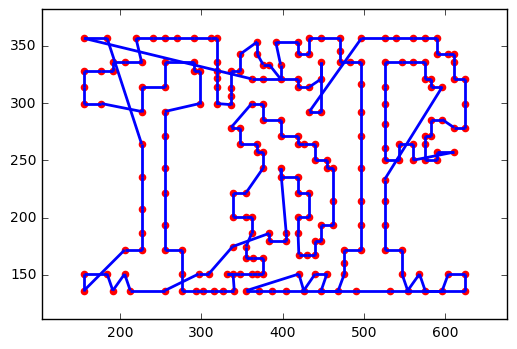

In [116]:
a,b=nearest_neighbour_tsa(graph225,116)
lines = [[k,v] for k,v in a.items()]
lines = [[tuple(coordinates225[k]),tuple(coordinates225[v])] for k,v in lines]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(coordinates225[:,0],coordinates225[:,1],color='red')

In [117]:
path2, score2 = greedy_tsa(graph29)
print(score2)
# check if there are doubles to check if the cycle is correct. If it is correct, this set should be empty
set([x for x in path2 if l.count(x) > 1])

2265.0


set()

In [118]:
%timeit greedy_tsa(graph29)

100 loops, best of 3: 1.76 ms per loop


In [119]:
%timeit greedy_tsa(graph225)

10 loops, best of 3: 138 ms per loop


2265.0


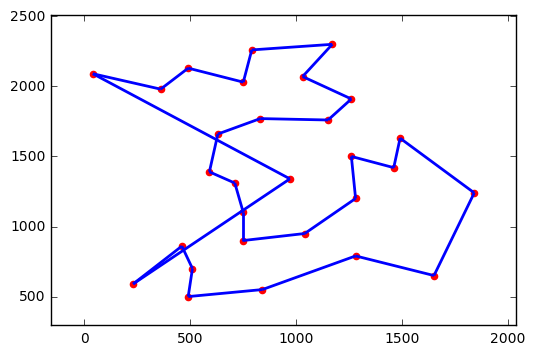

In [49]:
a,b=greedy_tsa(graph29)
lines = [[tuple(coordinates29[k]),tuple(coordinates29[v])] for k, v in a]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(coordinates29[:,0],coordinates29[:,1],color='red')
print(b)

4791.764004


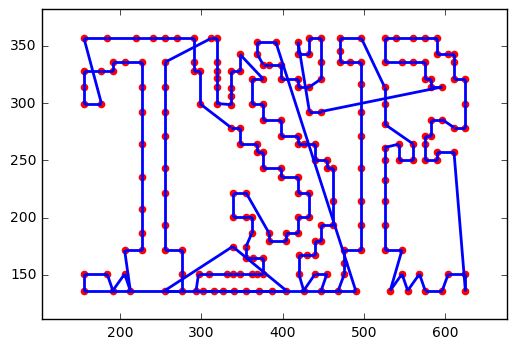

In [120]:
a,b=greedy_tsa(graph225)
lines = [[tuple(coordinates225[k]),tuple(coordinates225[v])] for k, v in a]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(coordinates225[:,0],coordinates225[:,1],color='red')
print(b)

**Question 2**
The algorithms give the following results:

* Nearest neighbour: 
        Graph29: 2356 is the optimal cost with the optimal starting point being 22, the algoritm takes 306 µs to run.
        Graph225: 5120 is the optimal cost with the optimal starting point being 116, the algoritm takes 25,6 ms to run

* Greedy:
        Graph29: 2265 is the optimal cost, the algoritm takes 1.76 ms to run.
        Graph225: 4792 is the optimal cost, the algoritm takes 138 ms to run.

**Question 4**

All tours for graph29 look correct (not necessarily optimal): points are not visited twice. For graph225 it seems like TSP has to be the output, and it looks like some points are passed twice. However, this is due to the weird form of the output, as a quick check learned that there are no doubles in my tour.

All tours do not look optimal. After a visual search, there are some parts of the tour which look like they can be rewired in a shorter way. For example, point 13 from graph29 seems to be very weird in the tour for the greedy algorithm, it looks like a very suboptimal path.

Sidenote: while optimizing the greedy algoritm, I got a sudden improvement in score for the greedy algoritm. The cause for this was that some edges have the same length and as such the choice between them is arbitrary. So using np.argsort() gave another output than np.argmin(). So i noticed that different implementations can lead to different results, although they are both correct.